In [2]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [3]:
t, m , g= smp.symbols('t m g')
the = smp.symbols('theta', cls = smp.Function)
the = the(t)
the_d = smp.diff(the)
the_dd = smp.diff(the_d)

In [4]:
x, y= smp.symbols("x y", cls=smp.Function)
x= x(the)
y= y(the)


In [5]:
#Definicja do zmian
path = 'cos'
if path =='parab':
    x= the
    y = the**2
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
if path =='normal':
    x= smp.cos(the)
    y = smp.sin(the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
if path =='tauto_P':
    x= smp.sin(2*the) + 2*the
    y = 1 - smp.cos(2*the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
if path =='cos':
    x= the
    y = 1-smp.cos(the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)



In [6]:
#Budowanie Lagrandżjanu
T = 1/2 * m * (smp.diff(x,t)**2 + smp.diff(y, t)**2)
V = m*g*(y)
L= T-V

In [7]:
#Równanie Eulera Lagrange
LE = smp.diff(L, the) - smp.diff(smp.diff(L,the_d),t)
LE = LE.simplify()

In [8]:
deriv_2 = smp.solve(LE, the_dd)[0] #druga pochodna theta
deriv_1 = the_d  # pierwsza pochodna theta

In [9]:
#Zmiana znaków w liczby
deriv2_f = smp.lambdify((g, the, the_d), deriv_2)
deriv1_f = smp.lambdify(the_d , the_d)

In [10]:
#Stworzenie równań różniczkowych pierwszego stopnia
# w = dtheta/dt
# S = (theta, w, dw/dt)
def dSdt(S, t):
    return [
        deriv1_f(S[1]), #w
        deriv2_f(g, S[0], S[1]) #dw/dt
    ]

In [11]:
t = np.linspace(0,20,1000)
g=9.81
ans1 = odeint(dSdt,y0=[np.pi/3, 0], t=t)
ans2 = odeint(dSdt,y0=[np.pi/6, 0], t=t)

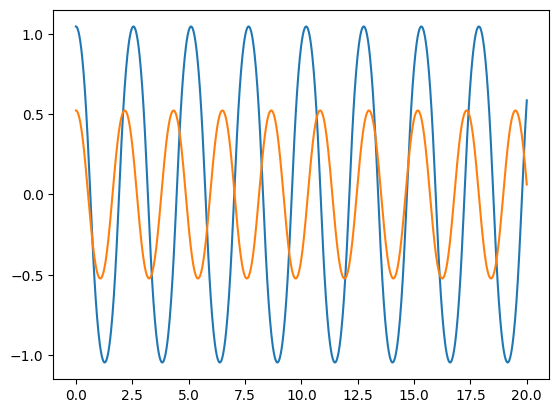

In [12]:
#Theta od czasu
plt.plot(t,ans1.T[0])
plt.plot(t,ans2.T[0])

In [13]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [14]:
x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

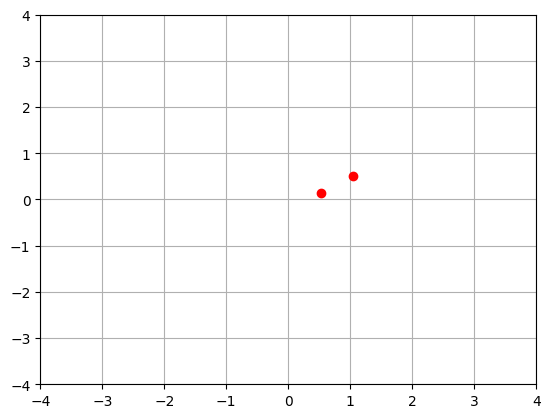

In [25]:
def animate(i):
    ln1.set_data([x1[i]],[y1[i]])
    ln2.set_data([x2[i]],[y2[i]])
fig, ax = plt.subplots(1,1)
ax.grid()
ln1,=plt.plot([],[],'ro')
ln2,=plt.plot([],[],'ro')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani=animation.FuncAnimation(fig,animate,frames=1000,interval=50)
ani.save('pen_cos.gif',writer='pillow',fps=50)